# Imports

In [28]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import sys

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))
from ev_forecasting_package.data_processing.VehicleRegistrationDataProcessing import LSOAVehicleRegistrationDataProcessor
from ev_forecasting_package.data_processing.SpatialDataProcessing import DistributionSubstationDataProcessor, LSOABoundariesDataProcessor
from ev_forecasting_package.models.DataMapper import DataMapper

# Processing the Data

Vehicle registration data for LSOAs in BANES

In [2]:
lsoa_vehicle_registration_data_processor = LSOAVehicleRegistrationDataProcessor(
    lsoa_lookup_path='../data/large_datasets/lsoa_boundaries/LSOA_(2011)_to_LSOA_(2021)_to_Local_Authority_District_(2022)_Lookup_for_England_and_Wales_(Version_2).csv'
)
raw_data_path = '../data/large_datasets/vehicle_registrations/raw_data'
meta_data = {
    'v_reg': {
        'file_name': 'df_VEH0125_2023_Q4.csv',
        'first': 5,
        'last': 57,
        'na_values': ['[c]', '[x]'],
    },
    'piv_reg': {
        'file_name': 'df_VEH0145_2023_Q4.csv',
        'first': 5,
        'last': 56,
        'na_values': ['[c]', '[x]'],
    }
}
filters_dict = {
    'v_reg': {
        'query': "BodyType == 'Cars' and Keepership == 'Private' and LicenceStatus == 'Licensed'",
        'dropped_cols': ['BodyType', 'Keepership', 'LicenceStatus', 'LSOA11NM']
    },
    'piv_reg': {
        'query': "Keepership == 'Private'",
        'dropped_cols': ['Keepership', 'LSOA11NM'] 
    }
}
LAD = 'Bath and North East Somerset'
lsoa_vehicle_registration_data_processor.run_pipeline(raw_data_path, meta_data, filters_dict, LAD)

Loading v_reg data from ../data/large_datasets/vehicle_registrations/raw_data/df_VEH0125_2023_Q4.csv
Loading piv_reg data from ../data/large_datasets/vehicle_registrations/raw_data/df_VEH0145_2023_Q4.csv
Pipeline run successfully


In [3]:
lsoa_vehicle_registration_data_processor.v_reg_df.head()

LSOA11CD,E01014370,E01014371,E01014372,E01014373,E01014374,E01014375,E01014376,E01014377,E01014379,E01014380,...,E01014478,E01014479,E01014480,E01014481,E01014482,E01014483,E01014484,E01033078,E01033079,E01033080
2009 Q4,386.0,557.0,591.0,703.0,641.0,799.0,957.0,872.0,1206.0,649.0,...,372.0,708.0,438.0,360.0,664.0,440.0,363.0,981.0,707.0,601.0
2010 Q1,384.0,547.0,595.0,692.0,627.0,791.0,966.0,876.0,1195.0,649.0,...,372.0,695.0,426.0,352.0,649.0,449.0,361.0,981.0,705.0,604.0
2010 Q2,378.0,549.0,604.0,696.0,628.0,805.0,966.0,868.0,1226.0,652.0,...,375.0,702.0,426.0,353.0,642.0,451.0,358.0,974.0,705.0,622.0
2010 Q3,406.0,538.0,588.0,684.0,637.0,811.0,975.0,865.0,1222.0,643.0,...,381.0,699.0,430.0,350.0,653.0,450.0,363.0,991.0,729.0,622.0
2010 Q4,389.0,540.0,561.0,692.0,633.0,804.0,982.0,839.0,1227.0,632.0,...,381.0,714.0,429.0,355.0,655.0,438.0,361.0,998.0,725.0,631.0


Distribution substation data for BANES

In [4]:
distribution_substation_data_processor = DistributionSubstationDataProcessor('../data/large_datasets/distribution_network/')
distribution_substation_data_processor.run_pipeline(
    ds_data_filename='distribution-substations-03-02-25.csv', 
    ds_geo_filename='south-west-distribution-03-02-25.gpkg',
    place='Bath and North East Somerset'
)
ds_gdf_banes = distribution_substation_data_processor.ds_gdf_filtered
ds_gdf_banes.head()

,Substation Number,geometry,NRID,NR_TYPE_ID,NAME,PRIM_NRID,PRIM_NR,PRIM_NRID_NAME,BSP_NRID,BSP_NR,...,Name,Grid Reference,Longitude,Latitude,Day Max Demand,Night Max Demand,Substation Rating,EV Chargers,Customers,Location
Substation Number,,,,,,,,,,,,,,,,,,,,,
110055,110055,"POLYGON ((-2.46167 51.39973, -2.46174 51.39976...",33528,19,Saltford Od,15042,111481,Keynsham East,119,162633,...,Saltford Od,ST682140670940,-2.45840,51.401900,302.0,205.0,500.0,3.0,132.0,POINT (-2.4584 51.4019)
110060,110060,"POLYGON ((-2.49497 51.40702, -2.49581 51.40727...",33532,19,Keelings Ss,15042,111481,Keynsham East,119,162633,...,Keelings Ss,ST658270679910,-2.49280,51.409800,132.0,65.0,315.0,2.0,113.0,POINT (-2.4928 51.4098)
110066,110066,"POLYGON ((-2.49769 51.40349, -2.49779 51.40351...",33542,19,Burnett Rd K,15042,111481,Keynsham East,119,162633,...,Burnett Rd K,ST658460673840,-2.49242,51.404389,116.0,58.0,300.0,4.0,95.0,POINT (-2.49242 51.40439)
110165,110165,"POLYGON ((-2.5136 51.41669, -2.51393 51.41716,...",33683,19,Stockwood Vale Od,15049,113180,Keynsham West,128239,113372,...,Stockwood Vale Od,ST644800689440,-2.51220,51.418300,69.0,34.0,500.0,0.0,47.0,POINT (-2.5122 51.4183)
110182,110182,"POLYGON ((-2.46675 51.40341, -2.46675 51.40341...",33715,19,Grange Road K,15042,111481,Keynsham East,119,162633,...,Grange Road K Saltford,ST677120673570,-2.46560,51.404300,78.0,41.0,315.0,4.0,55.0,POINT (-2.4656 51.4043)


LSOA boundary data for BANES

In [5]:
lsoa_boundaries_data_processor = LSOABoundariesDataProcessor('../data/large_datasets/lsoa_boundaries/')
lsoa_boundaries_data_processor.run_pipeline(
    lsoa_geo_filename='LSOA_2011_EW_BFC_V3_WGS84/LSOA_2011_EW_BFC_V3_WGS84.shp',
    lad='Bath and North East Somerset'
)
lsoa_gdf_banes = lsoa_boundaries_data_processor.lsoa_gdf_filtered
lsoa_gdf_banes.head()

,LSOA11NM,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,GlobalID,geometry
LSOA11CD,,,,,,,,
E01014370,Bath and North East Somerset 007A,375084,164994,-2.35941,51.3834,4168.323516,764bfbce-a1cc-4028-be4b-26902051bf9e,"POLYGON ((-2.35647 51.3892, -2.35618 51.38913,..."
E01014371,Bath and North East Somerset 007B,375328,164841,-2.35590,51.3821,4146.079795,213bd1e8-27ac-4ffc-8401-5c79156dc8f0,"POLYGON ((-2.35166 51.38534, -2.35158 51.3853,..."
E01014372,Bath and North East Somerset 007C,374832,165378,-2.36306,51.3869,2870.144109,65aeea18-794e-4244-8a7b-d820f94a90a0,"POLYGON ((-2.35597 51.3895, -2.35587 51.38942,..."
E01014373,Bath and North East Somerset 010A,377791,167691,-2.32068,51.4078,6720.118267,396a2c40-1a96-4bee-b5d2-317e937ae4ae,"POLYGON ((-2.32115 51.41364, -2.32114 51.41364..."
E01014374,Bath and North East Somerset 010B,378059,166769,-2.31677,51.3995,19927.251976,b192f67c-f8df-4435-bb2f-abaefc0ce29e,"POLYGON ((-2.30592 51.40806, -2.30591 51.40806..."


# Using the DataMapper Class

Firstly, we need to create an instance of the `DataMapper` class. We'll call this `data_mapper`.

The `DataMapper` class takes three inputs in the creation of an instance:
- `source_geometries` - The geometries of the areas containing the data we wish to map from. These are often administrative boundaries like LSOAs in this example.
- `target_geometries` - The geometries of the areas we wish to map data to. These can respresent the electricity supply areas of distribution substations (as is the case in this example).
- `target_customer_counts` - The number of customers/households contained within each target area.
- `probabilistic_rho` - A boolean variable that determines whether the proportion of customers contributed from each target geography to the source geography ($\rho$) is calculated probabilistically (By estimating the moments (mean and standard devation) of a beta distribution) or deterministically (taking simple proportions). If the precise locations of customers are known, $\rho$ can be calculated deterministically. However, if they are not known, the probabilistic approach introduces additional uncertainty into the mapping process. Currently, the precise customer locations are not modelled, but this could be updated in future versions (e.g. by leveraging Ordinance Survey data).

In [36]:
data_mapper = DataMapper(
    source_geometries=lsoa_gdf_banes.geometry,
    target_geometries=ds_gdf_banes.geometry,
    target_customer_counts=ds_gdf_banes.Customers,
    probabilisitic_rho=True
)

Next, we need to create a dictionary that contains the data that we wish to map. In this example, we want to map LSOA-level vehicle registration data to distribution substations in the BANES area. 

This data should have a ***mean*** and ***standard deviation (std_dev)***. If the data lacks uncertainty quantification, std_dev can be set to 0.

We'll store this data in the dictionary `data_dict`.

In [37]:
v_reg_data = lsoa_vehicle_registration_data_processor.v_reg_df.loc['2023 Q4']
bev_reg_data = lsoa_vehicle_registration_data_processor.bev_reg_df.loc['2023 Q4']
phev_reg_data = lsoa_vehicle_registration_data_processor.phev_reg_df.loc['2023 Q4']

data_dict = {
    'Vehicles' : pd.DataFrame({'mean': v_reg_data, 'std_dev': v_reg_data*0.}),
    'BEVs' : pd.DataFrame({'mean': bev_reg_data, 'std_dev': bev_reg_data*0.}),
    'PHEVs' : pd.DataFrame({'mean': phev_reg_data, 'std_dev': phev_reg_data*0.})
} # Example std_dev used here

To map the data to the target geographies, we run the method `.map_data()`, which is given the data dictionary we just created.

The mean and standard deviations of the mapped data are stored in a dictionary called `mapped_data_params`. 

In [38]:
data_mapper.map_data(data_dict)
data_mapper.mapped_data_params['Vehicles'].head()

,mean,std_dev
Substation Number,,
110055,148.006526,16.729196
110060,124.242632,15.852630
110066,120.700671,15.961721
110165,41.506426,8.749373
110182,72.189632,12.682946


Quantiles (0 to 1 in 0.01 intervals) for the mapped estimates can be accessed in the `quantiles_dict` dictionary, with keys matching the original unmapped data dictionary. 

In [39]:
data_mapper.quantiles_dict['Vehicles']

Substation Number,110055,110060,110066,110165,110182,110215,110234,110249,110258,110308,...,794539,794611,794653,794726,794727,794750,794759,794843,794920,794921
0.00,81.089741,60.832111,56.853787,6.508933,21.457848,56.029815,100.509398,107.267116,76.612668,134.600124,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.331211,0.000000,0.000000,0.000000
0.01,109.088596,87.363899,83.568155,21.152340,42.684687,82.341792,131.773126,136.247948,105.102878,167.118047,...,0.434596,0.000000,0.000000,0.000000,0.000000,0.000000,31.954254,0.000000,0.000000,0.000000
0.02,113.648957,91.685310,87.919304,23.537410,46.142045,86.627400,136.865259,140.968251,109.743270,172.414459,...,1.660917,0.000000,0.000000,0.000000,0.000000,0.000000,34.661760,0.457694,0.000000,0.000000
0.03,116.542360,94.427107,90.679968,25.050661,48.335628,89.346481,140.096055,143.963132,112.687450,175.774863,...,2.438979,0.000000,0.000000,0.000000,0.000000,0.000000,36.379586,1.027288,0.000000,0.000000
0.04,118.718955,96.489653,92.756709,26.189020,49.985775,91.391940,142.526456,146.216064,114.902241,178.302764,...,3.024284,0.000000,0.000000,0.000000,0.000000,0.000000,37.671840,1.455771,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.96,177.294097,151.995611,148.644634,56.823831,94.393488,146.438040,207.931892,206.845557,174.505325,246.332043,...,18.775653,0.000002,6.878568,0.000002,0.000002,0.000002,72.448158,12.986840,0.000002,0.000002
0.97,179.470691,154.058158,150.721374,57.962191,96.043635,148.483499,210.362293,209.098489,176.720117,248.859944,...,19.360958,0.000002,7.159767,0.000002,0.000002,0.000002,73.740411,13.415323,0.000002,0.000002
0.98,182.364094,156.799954,153.482039,59.475441,98.237218,151.202580,213.593089,212.093370,179.664297,252.220348,...,20.139019,0.000002,7.533572,0.000002,0.000002,0.000002,75.458237,13.984916,0.000002,0.000002
0.99,186.924456,161.121365,157.833187,61.860511,101.694576,155.488188,218.685222,216.813673,184.304688,257.516761,...,21.365341,0.000002,8.122735,0.000002,0.000002,0.000002,78.165744,14.882667,0.000002,0.000002


The mean mapped data can be plotted using the `.plot_mapped_data_mean()` method, which requires the name of the data you wish to map (the dame name as is defined in the data dictionary).

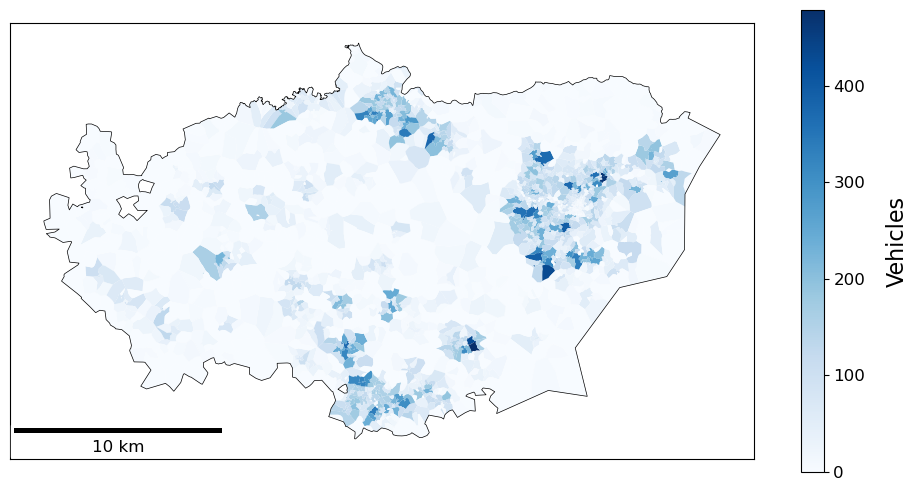

In [40]:
data_mapper.plot_mapped_data_mean(data_name='Vehicles')

# Validation

Here we simulate the exact location of vehicles within LSOAs as follows:
1. Initialise a population inside LSOAs based on substation customer distributions.
2. Randomly allocate assets to this population, assumming that each customer in an LSOA has an equal chance of owning a particular asset.
3. Count the number of assets present in each substation area.

Currently, we actually allocated parking spaces (3 per customer) to account for multiple vehicle ownership. Alternatively, I could sample the customers with replacement?

In [92]:
sample_points = gpd.GeoSeries(index=ds_gdf_banes.index, crs=ds_gdf_banes.crs)
customer_counts = ds_gdf_banes['Customers'].fillna(0).astype(int)
parking_spaces = 3*customer_counts # To account for multiple vehicle ownership...
# parking_spaces = customer_counts
for i, idx in enumerate(ds_gdf_banes.index):
    # n_samples = customer_counts.iloc[i]
    n_samples = parking_spaces.iloc[i]
    sample_points.iloc[i] = ds_gdf_banes.geometry.iloc[i:i+1].sample_points(n_samples).iloc[0]

<Axes: >

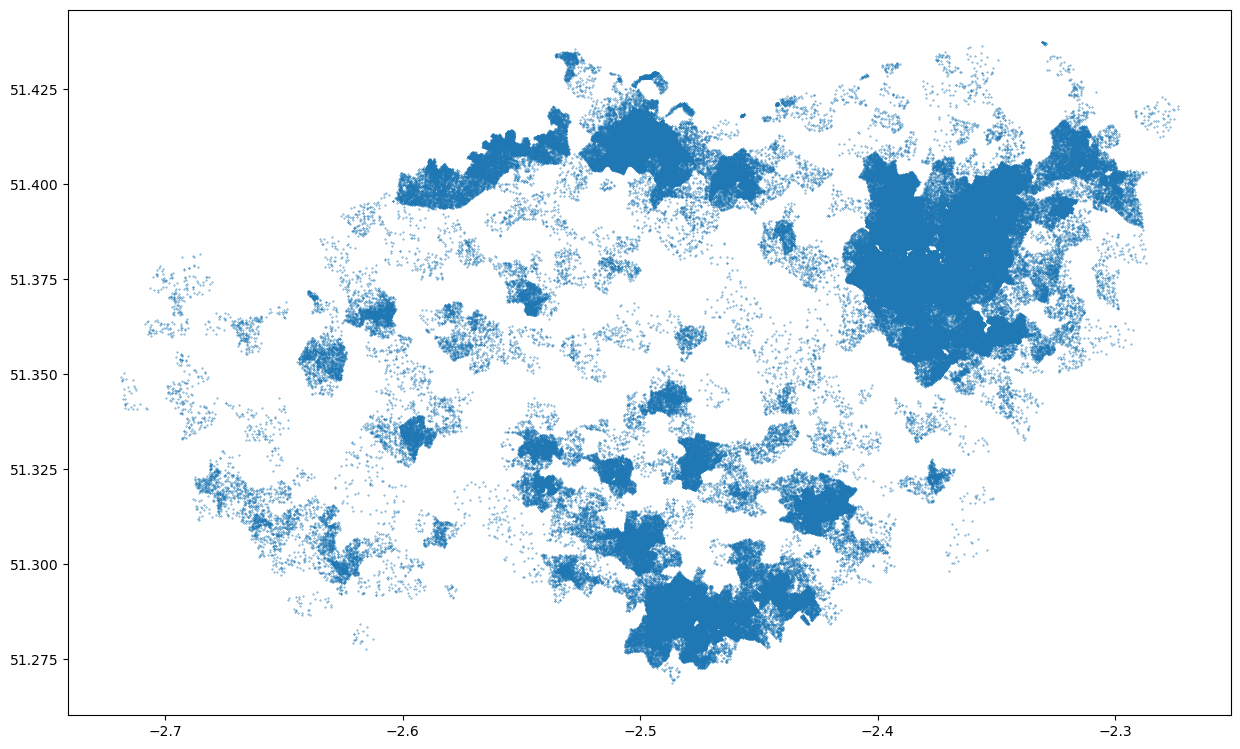

In [93]:
sample_points.plot(figsize=(15, 10), markersize=0.1)

In [94]:
sample_points_flat = gpd.GeoDataFrame(
    geometry=[point for multipoint in sample_points for point in multipoint.geoms],
    crs=ds_gdf_banes.crs
)
sample_points_flat

,geometry
0,POINT (-2.46181 51.40004)
1,POINT (-2.46176 51.40017)
2,POINT (-2.46165 51.39981)
3,POINT (-2.46163 51.40017)
4,POINT (-2.4616 51.39976)
...,...
285172,POINT (-2.39182 51.43081)
285173,POINT (-2.3918 51.43115)
285174,POINT (-2.39163 51.43071)
285175,POINT (-2.39135 51.4313)


In [95]:
joined = gpd.sjoin(sample_points_flat, lsoa_gdf_banes, predicate="within")
joined

,geometry,LSOA11CD,LSOA11NM,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,GlobalID
0,POINT (-2.46181 51.40004),E01014452,Bath and North East Somerset 016C,368611,168049,-2.45270,51.4106,8970.554859,f9db3913-26b9-4ee6-8b54-a5652ac12c64
1,POINT (-2.46176 51.40017),E01014452,Bath and North East Somerset 016C,368611,168049,-2.45270,51.4106,8970.554859,f9db3913-26b9-4ee6-8b54-a5652ac12c64
2,POINT (-2.46165 51.39981),E01014453,Bath and North East Somerset 016D,368342,166650,-2.45644,51.3980,6769.817049,b8ac1c30-3a2a-4c6a-a23e-0ea0156143bb
3,POINT (-2.46163 51.40017),E01014452,Bath and North East Somerset 016C,368611,168049,-2.45270,51.4106,8970.554859,f9db3913-26b9-4ee6-8b54-a5652ac12c64
4,POINT (-2.4616 51.39976),E01014453,Bath and North East Somerset 016D,368342,166650,-2.45644,51.3980,6769.817049,b8ac1c30-3a2a-4c6a-a23e-0ea0156143bb
...,...,...,...,...,...,...,...,...,...
285172,POINT (-2.39182 51.43081),E01014375,Bath and North East Somerset 010C,374266,168469,-2.37142,51.4146,37845.899638,2af13f2d-1d1e-4227-9bad-5ff6158eca9d
285173,POINT (-2.3918 51.43115),E01014375,Bath and North East Somerset 010C,374266,168469,-2.37142,51.4146,37845.899638,2af13f2d-1d1e-4227-9bad-5ff6158eca9d
285174,POINT (-2.39163 51.43071),E01014375,Bath and North East Somerset 010C,374266,168469,-2.37142,51.4146,37845.899638,2af13f2d-1d1e-4227-9bad-5ff6158eca9d
285175,POINT (-2.39135 51.4313),E01014375,Bath and North East Somerset 010C,374266,168469,-2.37142,51.4146,37845.899638,2af13f2d-1d1e-4227-9bad-5ff6158eca9d


In [96]:
from shapely.ops import unary_union
gdf_grouped = joined.groupby('LSOA11CD').geometry.apply(lambda x: unary_union(x))

# Convert back into a GeoDataFrame
gdf_multipoints = gpd.GeoDataFrame(gdf_grouped, geometry="geometry", crs=joined.crs).reset_index()

# Display the condensed GeoDataFrame
gdf_multipoints

,LSOA11CD,geometry
0,E01014370,"MULTIPOINT (-2.36319 51.3789, -2.36318 51.3782..."
1,E01014371,"MULTIPOINT (-2.36029 51.37772, -2.36018 51.377..."
2,E01014372,"MULTIPOINT (-2.36693 51.38591, -2.36689 51.385..."
3,E01014373,"MULTIPOINT (-2.33874 51.40444, -2.33869 51.404..."
4,E01014374,"MULTIPOINT (-2.34297 51.3925, -2.34296 51.3926..."
...,...,...
110,E01014483,"MULTIPOINT (-2.3628 51.37553, -2.36277 51.3756..."
111,E01014484,"MULTIPOINT (-2.37838 51.37905, -2.37832 51.379..."
112,E01033078,"MULTIPOINT (-2.38194 51.35077, -2.38193 51.351..."
113,E01033079,"MULTIPOINT (-2.41895 51.30561, -2.41888 51.305..."


In [97]:
gdf_multipoints['Vehicles'] = v_reg_data.values.astype(int)
gdf_multipoints

,LSOA11CD,geometry,Vehicles
0,E01014370,"MULTIPOINT (-2.36319 51.3789, -2.36318 51.3782...",350
1,E01014371,"MULTIPOINT (-2.36029 51.37772, -2.36018 51.377...",537
2,E01014372,"MULTIPOINT (-2.36693 51.38591, -2.36689 51.385...",500
3,E01014373,"MULTIPOINT (-2.33874 51.40444, -2.33869 51.404...",777
4,E01014374,"MULTIPOINT (-2.34297 51.3925, -2.34296 51.3926...",764
...,...,...,...
110,E01014483,"MULTIPOINT (-2.3628 51.37553, -2.36277 51.3756...",436
111,E01014484,"MULTIPOINT (-2.37838 51.37905, -2.37832 51.379...",445
112,E01033078,"MULTIPOINT (-2.38194 51.35077, -2.38193 51.351...",1035
113,E01033079,"MULTIPOINT (-2.41895 51.30561, -2.41888 51.305...",728


In [98]:
import random
from shapely.geometry import MultiPoint

def sample_points_from_multipoint(multipoint, n_samples):
    """
    Sample n_samples randomly from a MultiPoint geometry.
    """
    if isinstance(multipoint, MultiPoint):
        points = list(multipoint.geoms)  # Convert MultiPoint to a list of Point objects
        return MultiPoint(random.sample(points, min(n_samples, len(points))))  # Ensure we don't exceed available points
    return multipoint  # Return as-is if it's not MultiPoint

In [99]:
sampled_gdf_multipoints = gdf_multipoints.apply(lambda row: sample_points_from_multipoint(row.geometry, row["Vehicles"]), axis=1)
sampled_gdf_multipoints

0      MULTIPOINT (-2.36207 51.38374, -2.36237 51.381...
1      MULTIPOINT (-2.35698 51.38196, -2.35732 51.382...
2      MULTIPOINT (-2.35949 51.3885, -2.36237 51.3850...
3      MULTIPOINT (-2.31735 51.40533, -2.32073 51.412...
4      MULTIPOINT (-2.32036 51.39617, -2.31042 51.401...
                             ...                        
110    MULTIPOINT (-2.35179 51.37391, -2.3506 51.3763...
111    MULTIPOINT (-2.37185 51.37582, -2.37024 51.376...
112    MULTIPOINT (-2.32201 51.36178, -2.33156 51.353...
113    MULTIPOINT (-2.41295 51.32607, -2.41683 51.305...
114    MULTIPOINT (-2.36855 51.38585, -2.37057 51.386...
Length: 115, dtype: geometry

In [100]:
sampled_gdf_multipoints.count_coordinates()

0       350
1       537
2       500
3       777
4       764
       ... 
110     436
111     445
112    1035
113     728
114     624
Length: 115, dtype: int32

Uncomment the code below to rerun the validation simulation

In [35]:
###---UNCOMMENT TO RERUN SIMULATION---###

# from tqdm.notebook import tqdm
# import numpy as np

# ds_gdf_banes_dropped = ds_gdf_banes.drop(columns=['Substation Number'])

# n_trials = 200

# mapping_simulations = pd.DataFrame(index=np.arange(n_trials), columns=ds_gdf_banes_dropped.index, data=0)

# for j in tqdm(range(n_trials)):
#     sampled_gdf_multipoints = gdf_multipoints.apply(lambda row: sample_points_from_multipoint(row.geometry, row["Vehicles"]), axis=1)

#     # Step 1: Convert MultiPoints into a flat GeoDataFrame of Points
#     sample_points_flat = gpd.GeoDataFrame(
#         geometry=[point for multipoint in sampled_gdf_multipoints for point in multipoint.geoms],
#         crs=ds_gdf_banes_dropped.crs
#     )

#     # Step 2: Perform spatial join (find which polygon each point falls in)
#     joined = gpd.sjoin(sample_points_flat, ds_gdf_banes_dropped, predicate="within")

#     # Step 3: Count the number of points in each polygon
#     polygon_counts = joined.groupby(joined['Substation Number']).size().rename("point_count")

#     # Step 4: Merge the count back into the polygons GeoDataFrame
#     polygons_gdf = ds_gdf_banes_dropped.join(polygon_counts, how="left")

#     # Fill NaN (in case some polygons had 0 points)
#     polygons_gdf["point_count"] = polygons_gdf["point_count"].fillna(0).astype(int)

#     mapping_simulations.iloc[j] = polygons_gdf["point_count"]

# mapping_simulations.to_csv(f'mapping_simulations_{n_trials}_samples.csv')

In [20]:
mapping_simulations_200 = pd.read_csv('mapping_simulations_200_samples.csv', index_col=0)
mapping_simulations_200

,110055,110060,110066,110165,110182,110215,110234,110249,110258,110308,...,794539,794611,794653,794726,794727,794750,794759,794843,794920,794921
0,148,101,131,44,72,111,186,189,138,208,...,10,0,2,0,0,0,43,10,0,0
1,131,114,130,40,76,111,196,193,141,209,...,10,0,3,0,0,0,56,7,0,0
2,154,133,121,46,84,117,185,178,146,226,...,10,0,4,0,0,0,50,7,0,0
3,142,113,123,43,62,125,180,185,134,210,...,9,0,3,0,0,0,56,10,0,0
4,146,131,117,55,70,132,173,180,132,209,...,17,0,4,0,0,0,48,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,161,118,125,43,64,123,168,172,128,213,...,4,0,1,0,0,0,67,3,0,0
196,152,98,136,40,68,118,176,180,144,207,...,6,0,2,0,0,0,53,10,0,0
197,143,122,132,48,72,107,176,202,144,208,...,11,0,3,0,0,0,50,6,0,0
198,159,117,124,48,72,107,158,177,145,225,...,11,0,7,0,0,0,56,4,0,0


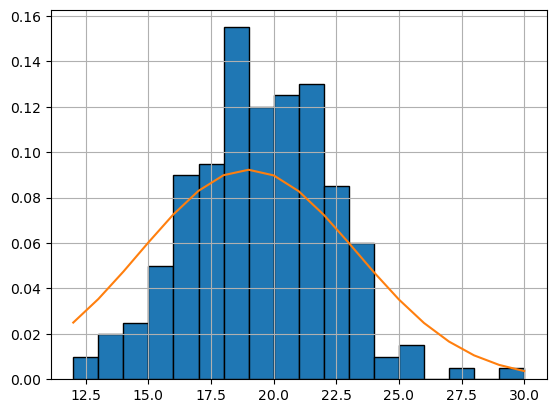

In [21]:
import scipy.stats as stats
import matplotlib.pyplot as plt

i=55

# Extract the relevant column
data = mapping_simulations_200.iloc[:, i]

# Define bin edges: start at min, end at max+1 (to include the max value), with step size 1
bins = range(int(data.min()), int(data.max()) + 2)  # +2 ensures max is included

# Create the histogram
data.hist(bins=bins, edgecolor='black', density=True)

mean = data_mapper.mapped_data_params['Vehicles']['mean'].iloc[i]
std_dev = data_mapper.mapped_data_params['Vehicles']['std_dev'].iloc[i]

plt.plot(bins, stats.norm.pdf(bins, loc=mean, scale=std_dev))

# Show the plot
plt.show()

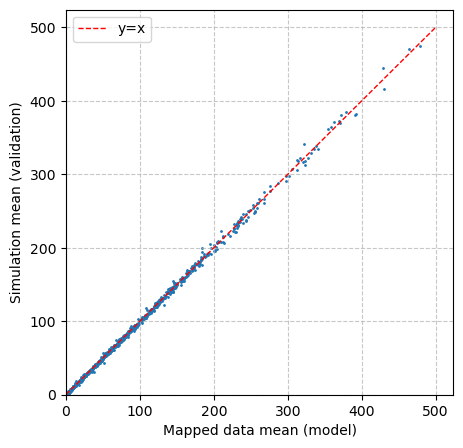

In [41]:
plt.figure(figsize=(5, 5))
plt.scatter(
    x=data_mapper.mapped_data_params['Vehicles']['mean'],
    y=mapping_simulations_200.mean(),
    s=1,
)
plt.plot(
    np.arange(0, 500, 1),
    np.arange(0, 500, 1),
    lw=1,
    linestyle='--',
    color='red',
    label=r'y=x'
)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('Mapped data mean (model)')
plt.ylabel('Simulation mean (validation)')
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.show()

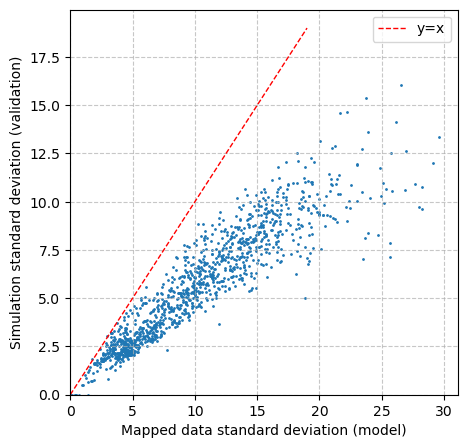

In [42]:
plt.figure(figsize=(5, 5))
plt.scatter(
    x=data_mapper.mapped_data_params['Vehicles']['std_dev'],
    y=mapping_simulations_200.std(),
    s=1,
)
plt.plot(
    np.arange(0, 20, 1),
    np.arange(0, 20, 1),
    lw=1,
    linestyle='--',
    color='red',
    label=r'y=x'
)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('Mapped data standard deviation (model)')
plt.ylabel('Simulation standard deviation (validation)')
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.show()

I suspect the different between these two standard deviations comes down to sample size. 

If the sample size were to be increased by 200, I suspect we would se a line much closer to a 1:1 ratio.

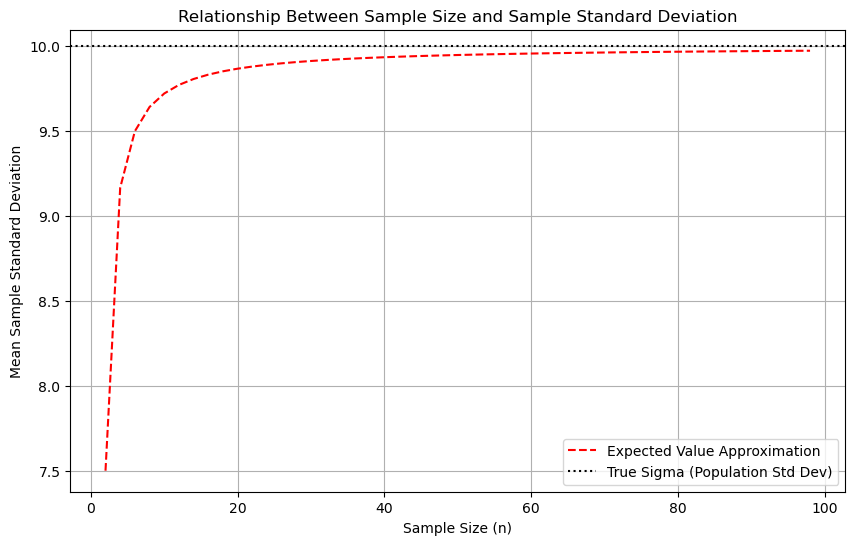

In [34]:
# Set parameters
sigma = 10  # True standard deviation
mu = 100     # True mean
sample_sizes = np.arange(2, 100, 2)  # Range of sample sizes to test
num_trials = 1000  # Number of repetitions for each sample size

# Store results
sample_std_means = []

# # Compute mean sample standard deviation for different sample sizes
# for n in sample_sizes:
#     stds = [np.std(np.random.normal(mu, sigma, n), ddof=1) for _ in range(num_trials)]
#     sample_std_means.append(np.mean(stds))

# Approximate expectation formula
expected_std = sigma * (1 - 1 / (4 * (sample_sizes - 1)))

# Plot results
plt.figure(figsize=(10, 6))
# plt.plot(sample_sizes, sample_std_means, label="Mean Sample Std Dev (Simulated)", marker='o')
plt.plot(sample_sizes, expected_std, label="Expected Value Approximation", linestyle="--", color="red")
plt.axhline(sigma, color='black', linestyle=':', label="True Sigma (Population Std Dev)")
plt.xlabel("Sample Size (n)")
plt.ylabel("Mean Sample Standard Deviation")
plt.title("Relationship Between Sample Size and Sample Standard Deviation")
plt.legend()
plt.grid(True)
plt.show()